# APROXIMACIÓN DE MÍNIMOS CUADRADOS EN EL INDICE DE GINI

## Importar las librerías

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Cargar el archivo CSV

In [37]:
gini_dataset = pd.read_csv('C:/Users/vanev/OneDrive/Proyecto final/gini_by_country.csv')
data = pd.DataFrame(gini_dataset)
data.head()

,country_code,country_name,year,value
0,AGO,Angola,2000,52.0
1,AGO,Angola,2008,42.7
2,AGO,Angola,2018,51.3
3,ALB,Albania,1996,27.0
4,ALB,Albania,2002,31.7


## Lista de países de América Latina

In [50]:
paises_latinoamerica = [
    "Argentina", "Bolivia", "Brasil", "Chile", "Colombia", "Costa Rica", "Cuba",
    "República Dominicana", "Ecuador", "El Salvador", "Guatemala", "Haití", "Honduras",
    "México", "Nicaragua", "Panamá", "Paraguay", "Perú", "Puerto Rico", "Uruguay", "Venezuela"
]

# Filtrar los datos para incluir solo los países de América Latina
datos_latinoamerica = datos[datos["Country Name"].isin(paises_latinoamerica)]

# Mostrar las primeras filas de los datos filtrados
print(datos_latinoamerica.head())



   Series Name  Series Code Country Name Country Code 1990 [YR1990]  \
7   Gini index  SI.POV.GINI    Argentina          ARG            ..   
23  Gini index  SI.POV.GINI      Bolivia          BOL            42   
40  Gini index  SI.POV.GINI        Chile          CHL          57.2   
42  Gini index  SI.POV.GINI     Colombia          COL            ..   
46  Gini index  SI.POV.GINI   Costa Rica          CRI          45.3   

   2000 [YR2000] 2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017]  \
7           51.1          41.8            ..          42.3          41.4   
23          61.6          47.8          46.7          45.2          44.6   
40          52.8            ..          45.3            ..          45.3   
42          58.7          52.6            51          50.6          49.7   
46          47.4          48.6          48.4          48.7          48.3   

   2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021] 2022 [YR2022]  \
7           41.7          43.3          

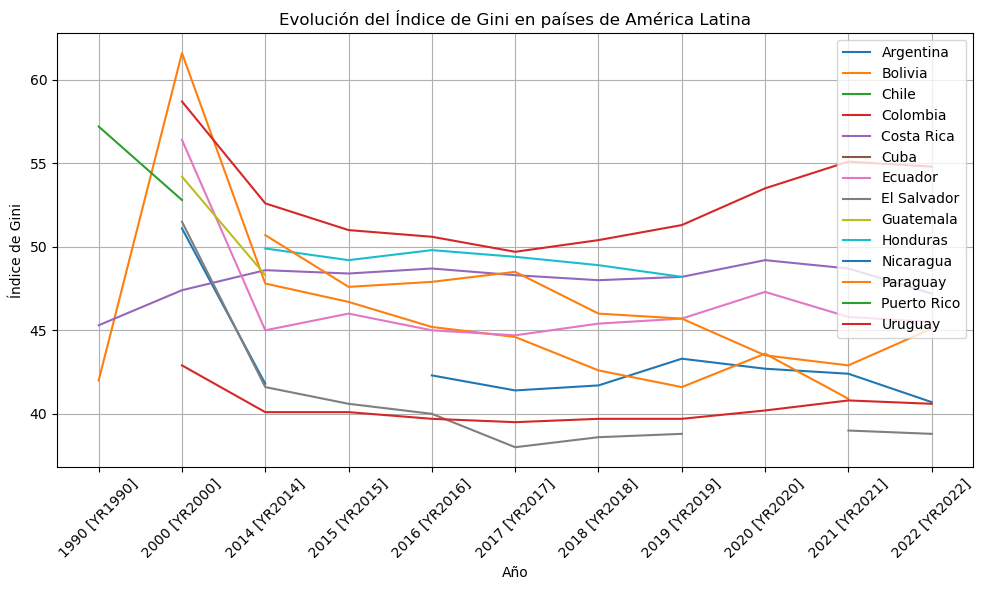

In [45]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada país de América Latina y trazar su Índice de Gini a lo largo del tiempo
for pais in paises_latinoamerica:
    datos_pais = datos_latinoamerica[datos_latinoamerica["Country Name"] == pais]
    if not datos_pais.empty:  # Verificar si datos_pais no está vacío
        anios = datos_pais.columns[4:]  # Columnas correspondientes a los años
        valores_gini = datos_pais.iloc[0, 4:].replace('..', np.nan).astype(float)  # Reemplazar '..' con NaN y convertir a float
        plt.plot(anios, valores_gini, label=pais)

# Configurar etiquetas y leyenda
plt.xlabel('Año')
plt.ylabel('Índice de Gini')
plt.title('Evolución del Índice de Gini en países de América Latina')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()
plt.show()

In [46]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [47]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [48]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.52482781]
 [1.01658736]]


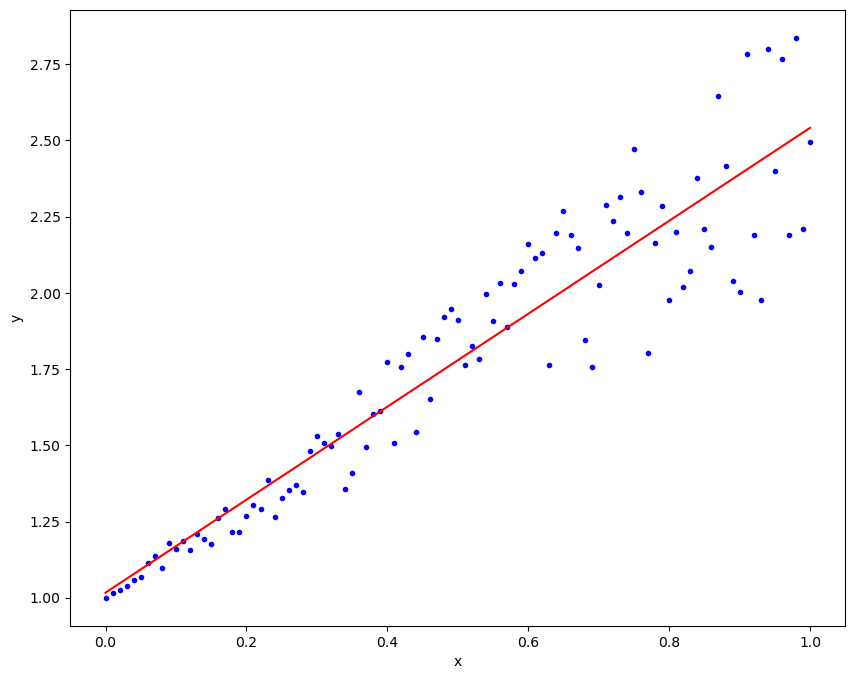

In [49]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [51]:
    # Seleccionar las columnas relevantes: "Country Name", los años y el Índice de Gini
datos_relevantes = datos_latinoamerica[['Country Name', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]']]

# Mostrar las primeras filas del DataFrame con las columnas relevantes
print(datos_relevantes.head())


   Country Name 2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017]  \
7     Argentina          41.8            ..          42.3          41.4   
23      Bolivia          47.8          46.7          45.2          44.6   
40        Chile            ..          45.3            ..          45.3   
42     Colombia          52.6            51          50.6          49.7   
46   Costa Rica          48.6          48.4          48.7          48.3   

   2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021]  
7           41.7          43.3          42.7          42.4  
23          42.6          41.6          43.6          40.9  
40            ..            ..            47            ..  
42          50.4          51.3          53.5          55.1  
46            48          48.2          49.2          48.7  


In [55]:
#Modeling : Multiple Linear Regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [59]:
# Eliminar la columna 'country_code'
X = gini_df.drop(["value", "country_name", "country_code"], axis=1)
y = gini_df["value"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Ajustar el modelo
model = LinearRegression().fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar el error RMSE en el conjunto de prueba
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Test RMSE: 8.987202727819438


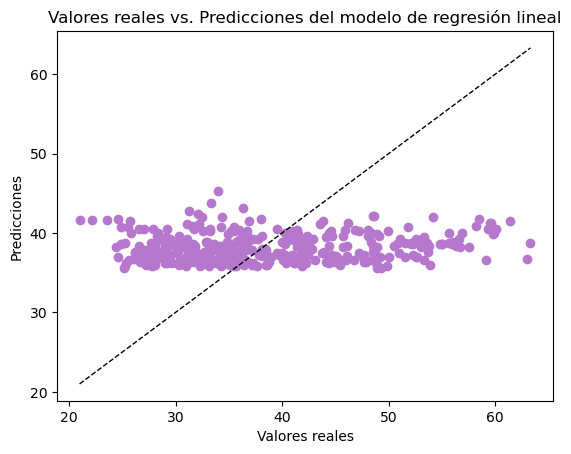

In [65]:
# Graficar los valores reales vs. las predicciones
plt.scatter(y_test, y_pred, color='#B578CC')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones del modelo de regresión lineal')
plt.show()


In [66]:
from sklearn.preprocessing import PolynomialFeatures

# Crear un objeto PolynomialFeatures para agregar la característica cuadrática
poly_features = PolynomialFeatures(degree=2)

# Transformar las características originales para agregar la característica cuadrática
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Ajustar un modelo de regresión lineal a las características polinómicas
model_poly = LinearRegression().fit(X_train_poly, y_train)

# Predecir los valores del conjunto de prueba
y_pred_poly = model_poly.predict(X_test_poly)

# Calcular el RMSE para evaluar el modelo
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("Test RMSE (modelo cuadrático):", rmse_poly)


Test RMSE (modelo cuadrático): 8.94036263892388


C:\Users\vanev\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


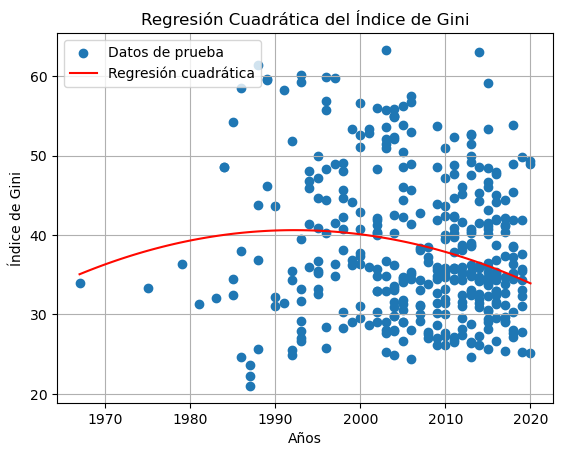

In [68]:
# Crear puntos de datos adicionales para trazar la línea de regresión cuadrática
X_plot = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

# Predecir los valores para los puntos de datos adicionales
y_plot_poly = model_poly.predict(X_plot_poly)

# Graficar los puntos de datos originales
plt.scatter(X_test, y_test, label='Datos de prueba')

# Graficar la línea de regresión cuadrática
plt.plot(X_plot, y_plot_poly, color='#FF0800', label='Regresión cuadrática')

# Configurar etiquetas y leyenda
plt.xlabel('Años')
plt.ylabel('Índice de Gini')
plt.title('Regresión Cuadrática del Índice de Gini')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [69]:
from sklearn.preprocessing import PolynomialFeatures

# Crear características polinómicas de tercer grado
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Ajustar el modelo de regresión lineal con características polinómicas
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Calcular el RMSE en el conjunto de prueba
y_pred_poly = model_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("Test RMSE (modelo cúbico):", rmse_poly)


Test RMSE (modelo cúbico): 8.947931911646716


C:\Users\vanev\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


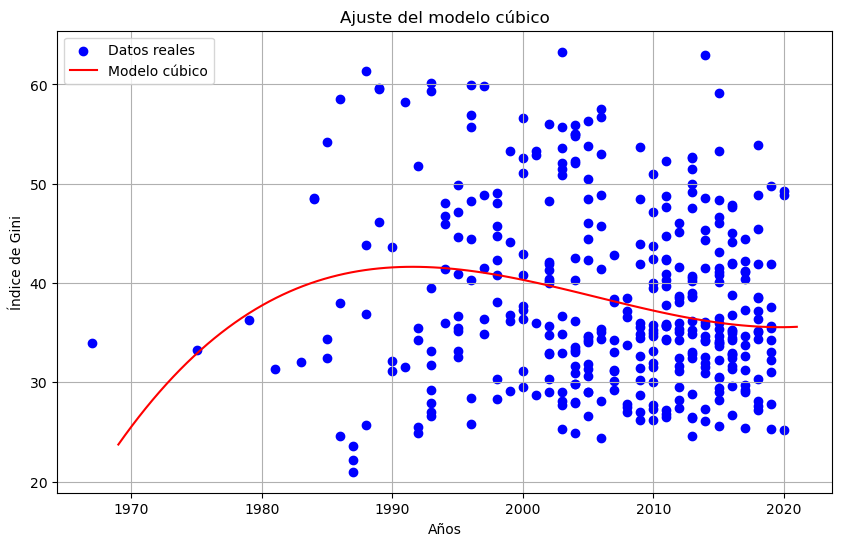

In [70]:
# Crear un rango de valores para la variable independiente (años)
years_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Crear características polinómicas de tercer grado para el rango de años
years_range_poly = poly_features.transform(years_range)

# Predecir los valores de Gini index utilizando el modelo cúbico
predicted_values_poly = model_poly.predict(years_range_poly)

# Graficar los datos de prueba y la línea de regresión cúbica
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(years_range, predicted_values_poly, color='red', label='Modelo cúbico')
plt.title('Ajuste del modelo cúbico')
plt.xlabel('Años')
plt.ylabel('Índice de Gini')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# Transformar la variable dependiente (Índice de Gini) tomando el logaritmo natural
y_train_log = np.log(y_train)

# Inicializar el modelo de regresión lineal
model_exp = LinearRegression()

# Ajustar el modelo a los datos transformados
model_exp.fit(X_train, y_train_log)

# Calcular las predicciones para los datos de prueba
y_pred_log = model_exp.predict(X_test)

# Transformar las predicciones de nuevo al espacio original utilizando la función exponencial
y_pred_exp = np.exp(y_pred_log)


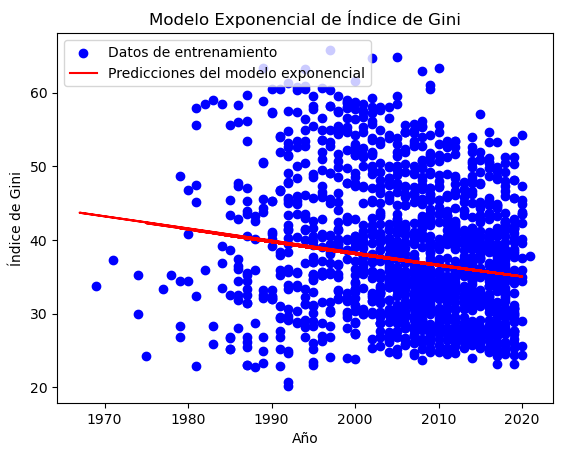

In [72]:
import matplotlib.pyplot as plt

# Graficar los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')

# Graficar las predicciones del modelo exponencial
plt.plot(X_test, y_pred_exp, color='red', label='Predicciones del modelo exponencial')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Índice de Gini')
plt.title('Modelo Exponencial de Índice de Gini')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [74]:
gini_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  1896 non-null   object 
 1   country_name  1896 non-null   object 
 2   year          1896 non-null   int64  
 3   value         1896 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 59.4+ KB


Test RMSE: 0.14695464030628966


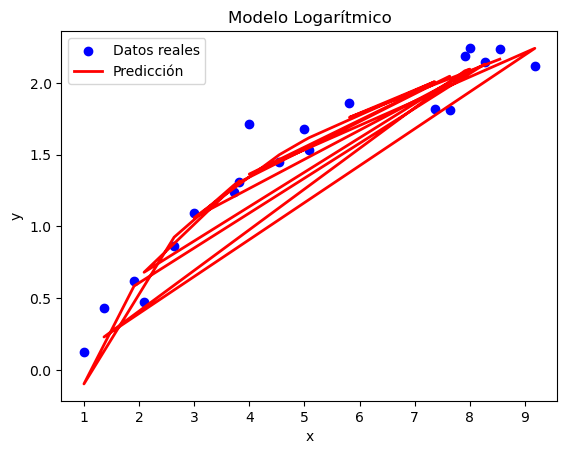

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos' con las columnas 'x' y 'y'
# Aquí creamos un DataFrame de ejemplo para ilustrar el proceso
datos = pd.DataFrame({
    'x': np.linspace(1, 10, 100),
    'y': np.log(np.linspace(1, 10, 100)) + np.random.normal(scale=0.2, size=100)
})

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos[['x']], datos['y'], test_size=0.2, random_state=42)

# Inicializar y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(np.log(X_train), y_train)

# Predecir los valores de y para el conjunto de prueba
y_pred = modelo.predict(np.log(X_test))

# Calcular el error cuadrático medio (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción')
plt.title('Modelo Logarítmico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
